In [1]:
import xarray as xr
from cdo import Cdo
import numpy as np
from climtools import climtools_lib as ctl
import glob

No DISPLAY variable set. Switching to agg backend


In [2]:
import pygrib

In [17]:
cart = '/data-hobbes/fabiano/alluvione/trend_v1/'
trnew = xr.open_dataset(cart + 'trend_ERA5_levels.nc')

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
trnew['delta_T']

<xarray.DataArray 'delta_T' (lev: 113, lat: 241, lon: 421)>
[11465093 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 10.0 10.25 10.5 10.75 11.0 ... 69.25 69.5 69.75 70.0
  * lon      (lon) float64 -50.0 -49.75 -49.5 -49.25 ... 54.25 54.5 54.75 55.0
  * lev      (lev) float64 25.0 26.0 27.0 28.0 29.0 ... 134.0 135.0 136.0 137.0

[5.0, 20.0, 35.0, 50.0]
[5.0, 20.0, 35.0, 50.0]
[5.0, 20.0, 35.0, 50.0]
[5.0, 20.0, 35.0, 50.0]
[5.0, 20.0, 35.0, 50.0]
[5.0, 20.0, 35.0, 50.0]


[<Figure size 1500x1200 with 7 Axes>]

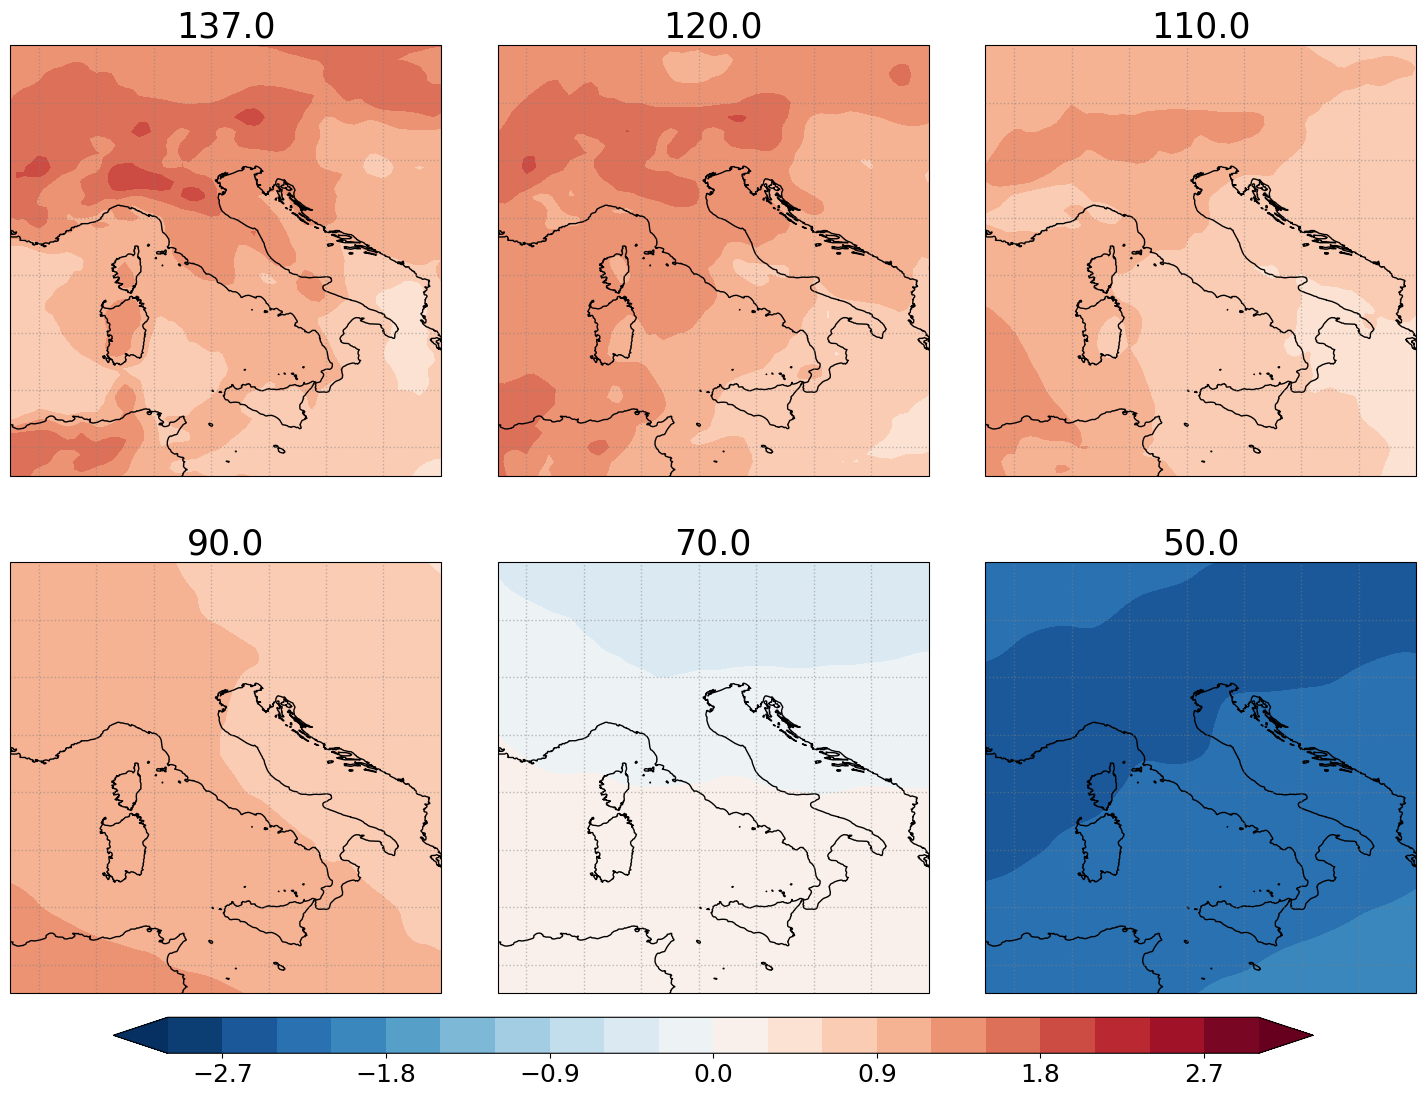

In [52]:
ctl.plot_multimap_contour([trnew['delta_T'].sel(lev = ilev, lat = slice(35, 50), lon = slice(5, 20)) for ilev in [137., 120., 110., 90., 70., 50.]], subtitles = [str(ilev) for ilev in [137., 120., 110., 90., 70., 50.]], plot_anomalies=True, cbar_range = (-3, 3))

In [58]:
def fact(T1, T2):
    """
    Scaling factor for specific humidity.
    """
    alpha1 = 17.67*(T1-273.15)/(T1-29.65)
    alpha2 = 17.67*(T2-273.15)/(T2-29.65)
    return np.exp(alpha2-alpha1)

In [60]:
Q_pert = fact(inicon['t'], inicon['t']-trnew['delta_T'])

In [62]:
Q_pert

<xarray.DataArray (time: 1, lev: 113, lat: 241, lon: 421)>
array([[[[1.39573482, 1.39594684, 1.39613863, ..., 1.31830975,
          1.31850488, 1.31870069],
         [1.39707608, 1.39723463, 1.39737414, ..., 1.31613326,
          1.31635464, 1.31657682],
         [1.39795082, 1.39804059, 1.39810512, ..., 1.31394134,
          1.31417571, 1.31440702],
         ...,
         [1.64971172, 1.64944707, 1.64939614, ..., 1.62192609,
          1.6206125 , 1.61955859],
         [1.65163424, 1.65114799, 1.65097039, ..., 1.62566247,
          1.62408208, 1.6227075 ],
         [1.65329481, 1.65246863, 1.65200025, ..., 1.62945797,
          1.62780419, 1.62633564]],

        [[1.33793568, 1.33821089, 1.33848938, ..., 1.24652855,
          1.24661039, 1.24669799],
         [1.33946466, 1.33975205, 1.3400407 , ..., 1.2459838 ,
          1.24601994, 1.24605851],
         [1.34107566, 1.34133668, 1.34158647, ..., 1.24570399,
          1.24571415, 1.24571452],
...
         [0.98895024, 0.99585973, 0.98118601, ..., 0.97094129,
          0.97108464, 0.97196334],
         [0.98949525, 0.98890402, 0.97496091, ..., 0.97003501,
          0.9702522 , 0.97085513],
         [0.98804892, 0.98837093, 0.97258084, ..., 0.96943209,
          0.96966037, 0.96994295]],

        [[0.86517475, 0.89965021, 0.92338268, ..., 0.76585795,
          0.76730001, 0.76862541],
         [0.86086725, 0.90262518, 0.92783747, ..., 0.76527152,
          0.76633607, 0.76729656],
         [0.85321546, 0.89493801, 0.91987084, ..., 0.76595361,
          0.76629519, 0.76683265],
         ...,
         [0.98809352, 0.996361  , 0.98278735, ..., 0.97113099,
          0.97126701, 0.97215474],
         [0.98864498, 0.99040018, 0.97648707, ..., 0.97020467,
          0.97040604, 0.97100807],
         [0.98720869, 0.98978801, 0.9740288 , ..., 0.9695816 ,
          0.96978865, 0.97006686]]]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-30
  * lon      (lon) float64 -50.0 -49.75 -49.5 -49.25 ... 54.25 54.5 54.75 55.0
  * lat      (lat) float64 70.0 69.75 69.5 69.25 69.0 ... 10.75 10.5 10.25 10.0
  * lev      (lev) float64 25.0 26.0 27.0 28.0 29.0 ... 134.0 135.0 136.0 137.0

In [68]:
Q_pert.sel(lev = 137., lat = slice(50, 35), lon = slice(5, 20)).isel(time = 0)

<xarray.DataArray (lat: 61, lon: 61)>
array([[0.91607697, 0.91334433, 0.91106925, ..., 0.90235055, 0.90282875,
        0.90312187],
       [0.91424754, 0.91222968, 0.91075365, ..., 0.9043389 , 0.90488721,
        0.90534177],
       [0.91291949, 0.91186922, 0.91134432, ..., 0.9037612 , 0.90452241,
        0.90569087],
       ...,
       [0.90579746, 0.90547781, 0.90537562, ..., 0.96261703, 0.9639714 ,
        0.96416065],
       [0.90591789, 0.90704803, 0.90975308, ..., 0.96435189, 0.96499247,
        0.96526552],
       [0.90753985, 0.90911303, 0.91265018, ..., 0.9644897 , 0.9650184 ,
        0.96513879]])
Coordinates:
    time     datetime64[ns] 2023-04-30
  * lon      (lon) float64 5.0 5.25 5.5 5.75 6.0 ... 19.0 19.25 19.5 19.75 20.0
  * lat      (lat) float64 50.0 49.75 49.5 49.25 49.0 ... 35.75 35.5 35.25 35.0
    lev      float64 137.0

[5.0, 20.0, 50.0, 35.0]
[5.0, 20.0, 50.0, 35.0]
[5.0, 20.0, 50.0, 35.0]
[5.0, 20.0, 50.0, 35.0]
[5.0, 20.0, 50.0, 35.0]
[5.0, 20.0, 50.0, 35.0]


[<Figure size 1500x1200 with 7 Axes>]

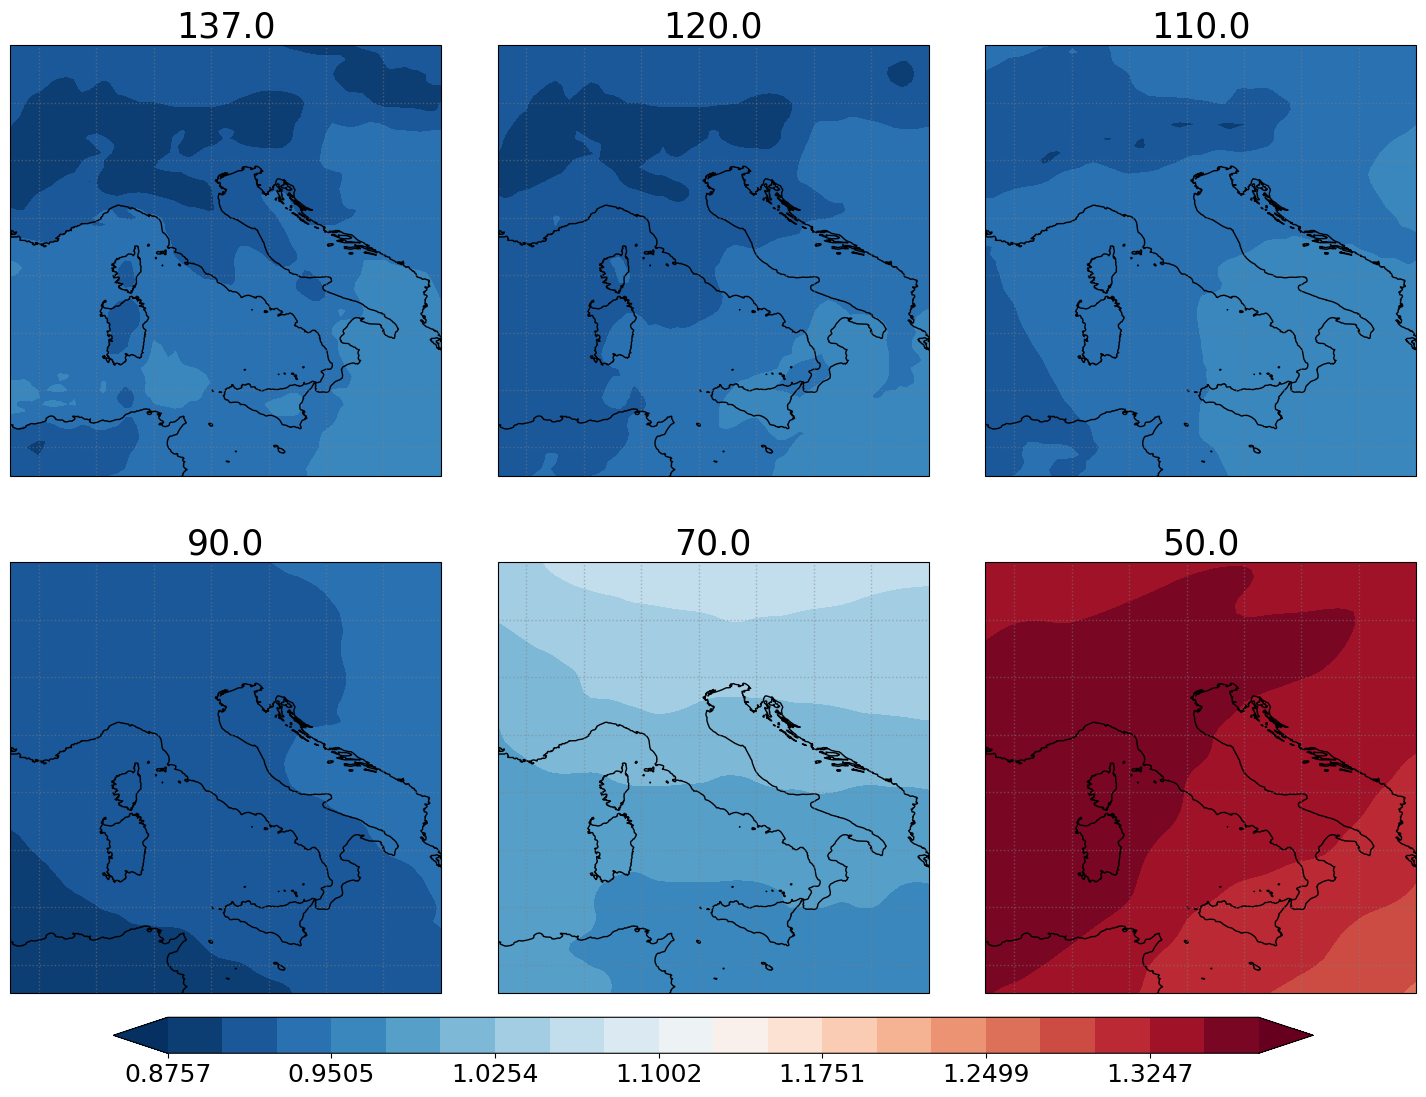

In [69]:
ctl.plot_multimap_contour([Q_pert.sel(lev = ilev, lat = slice(50, 35), lon = slice(5, 20)).isel(time = 0) for ilev in [137., 120., 110., 90., 70., 50.]], subtitles = [str(ilev) for ilev in [137., 120., 110., 90., 70., 50.]])

In [39]:
trends = xr.open_mfdataset(cart + '*amj*linTrend.nc')

[-50.0, 55.0, 10.0, 70.0]


<GeoAxes: >

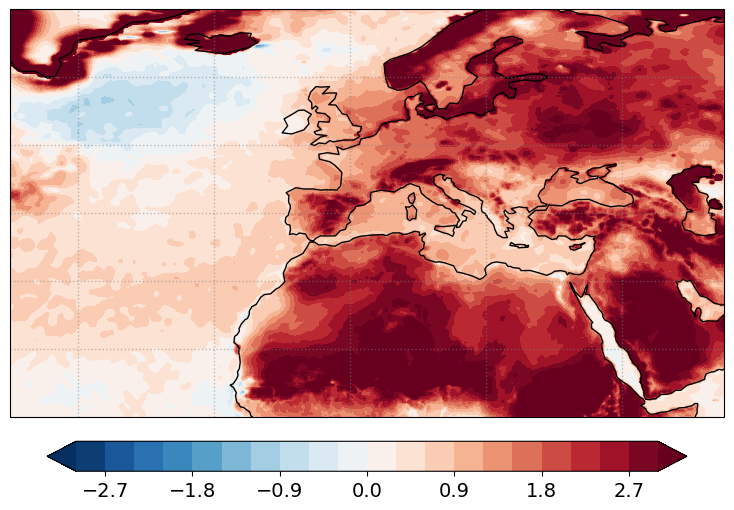

In [47]:
ctl.plot_map_contour(trends['STL1'], cbar_range = (-3, 3))

In [ ]:
trnew['T_trend']

fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(20, 10))  # 5 rows, 10 columns
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate through

# Plot each snapshot
for enu, i in enumerate(range(25, 100, 2)):
    ax = axes[enu]
    ax.imshow(trnew['T_trend'].sel(lev=i))

- Ciao Fede, dovrei avere tutti i trend lineari che servono per fare un primo test con perturbazione in MOLOCH
- /home/zappa/EM-moloch/data/nc
- Perturberei queste quattro: ln_surface_pressure; skin_temperature; soil_temperature_level_1; temperature ... più l'aggiustamento sulla specific humidity assumendo relative humidity costante
- (anche se la relative humidity non sembra costante, da trend lineare!)

In [55]:
# cart_init = '/home/fabiano/moloch_ini/ERA5/GRIB2/'
# cart_out = '/home/fabiano/moloch_ini/perturbed_v1/'

cart_init = '/data-hobbes/fabiano/alluvione/init_ERA5_GRIB2/GRIB2/'
cart_out = '/data-hobbes/fabiano/alluvione/init_ERA5_GRIB2/perturbed_v1/'
ctl.mkdir(cart_out)

cart = '/data-hobbes/fabiano/alluvione/trend_v1/'


In [160]:
allfi_grib = glob.glob(cart_init + '*.grib2')
allfi_grib.sort()

In [4]:
gugu = xr.load_dataset(cart + 'surface_pressure_amj_clim.nc')

In [6]:
gugu['aps'].shape

(241, 421)

In [56]:
# fil = cart_init + 'IFS_Era5_2023043000.grib.grib2'
# inicon = xr.open_dataset(fil, engine = 'cfgrib', filter_by_keys={'typeOfLevel': 'hybrid'})

fil = cart_init + '../orig_nc/IFS_Era5_2023043000.grib.grib2.nc'
inicon = xr.open_dataset(fil)

In [164]:
(cart_init + fil).split('/')[-1]

'IFS_Era5_2023043000.grib.grib2'

In [93]:
trends

<xarray.Dataset>
Dimensions:  (time: 1, lon: 421, lat: 241, plev: 19)
Coordinates:
  * time     (time) float64 9.969e+36
  * lon      (lon) float64 -50.0 -49.75 -49.5 -49.25 ... 54.25 54.5 54.75 55.0
  * lat      (lat) float64 10.0 10.25 10.5 10.75 11.0 ... 69.25 69.5 69.75 70.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Data variables:
    MSL      (lat, lon) float32 dask.array<chunksize=(241, 421), meta=np.ndarray>
    R        (plev, lat, lon) float32 dask.array<chunksize=(10, 140, 221), meta=np.ndarray>
    SKT      (lat, lon) float32 dask.array<chunksize=(241, 421), meta=np.ndarray>
    STL1     (lat, lon) float32 dask.array<chunksize=(241, 421), meta=np.ndarray>
    T        (plev, lat, lon) float32 dask.array<chunksize=(10, 120, 211), meta=np.ndarray>
    lnsp     (lat, lon) float32 dask.array<chunksize=(241, 421), meta=np.ndarray>

In [16]:
aka_era5 = inicon['hyam'].values
bika_era5 = inicon['hybm'].values

In [3]:
cart = '/data-hobbes/fabiano/alluvione/trend_v1/'

trends = xr.open_mfdataset(cart + '*amj*linTrend.nc')

In [10]:
surfpres = xr.open_dataset(cart + 'surface_pressure_amj_clim.nc')

In [11]:
surfpres

<xarray.Dataset>
Dimensions:  (time: 1, lon: 421, lat: 241)
Coordinates:
  * time     (time) float64 9.969e+36
  * lon      (lon) float64 -50.0 -49.75 -49.5 -49.25 ... 54.25 54.5 54.75 55.0
  * lat      (lat) float64 70.0 69.75 69.5 69.25 69.0 ... 10.75 10.5 10.25 10.0
Data variables:
    aps      (lat, lon) float32 ...

In [12]:
surfpres['aps'].mean(), surfpres['aps'].min(), surfpres['aps'].max()

(<xarray.DataArray 'aps' ()>
 array(98549.04, dtype=float32),
 <xarray.DataArray 'aps' ()>
 array(68818.82, dtype=float32),
 <xarray.DataArray 'aps' ()>
 array(102796.2, dtype=float32))

In [12]:
trends

<xarray.Dataset>
Dimensions:  (time: 1, lon: 421, lat: 241, plev: 19)
Coordinates:
  * time     (time) float64 9.969e+36
  * lon      (lon) float64 -50.0 -49.75 -49.5 -49.25 ... 54.25 54.5 54.75 55.0
  * lat      (lat) float64 10.0 10.25 10.5 10.75 11.0 ... 69.25 69.5 69.75 70.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Data variables:
    MSL      (lat, lon) float32 dask.array<chunksize=(241, 421), meta=np.ndarray>
    R        (plev, lat, lon) float32 dask.array<chunksize=(10, 140, 221), meta=np.ndarray>
    SKT      (lat, lon) float32 dask.array<chunksize=(241, 421), meta=np.ndarray>
    STL1     (lat, lon) float32 dask.array<chunksize=(241, 421), meta=np.ndarray>
    T        (plev, lat, lon) float32 dask.array<chunksize=(10, 120, 211), meta=np.ndarray>
    lnsp     (lat, lon) float32 dask.array<chunksize=(241, 421), meta=np.ndarray>

In [150]:
for var in trends.data_vars:
    print(var, trends[var].mean().compute())

MSL <xarray.DataArray 'MSL' ()>
array(0.00599208, dtype=float32)
R <xarray.DataArray 'R' ()>
array(-0.01760377, dtype=float32)
SKT <xarray.DataArray 'SKT' ()>
array(1.2849182, dtype=float32)
STL1 <xarray.DataArray 'STL1' ()>
array(1.494814, dtype=float32)
T <xarray.DataArray 'T' ()>
array(-0.82579046, dtype=float32)
lnsp <xarray.DataArray 'lnsp' ()>
array(0.00015638, dtype=float32)


In [8]:
inicon

<xarray.Dataset>
Dimensions:        (time: 1, lon: 421, lat: 241, lev: 113, nhyi: 138,
                    nhym: 137, lev_2: 1, depth: 1, bnds: 2, depth_2: 4)
Coordinates:
  * time           (time) datetime64[ns] 2023-04-30
  * lon            (lon) float64 -50.0 -49.75 -49.5 -49.25 ... 54.5 54.75 55.0
  * lat            (lat) float64 70.0 69.75 69.5 69.25 ... 10.75 10.5 10.25 10.0
  * lev            (lev) float64 25.0 26.0 27.0 28.0 ... 134.0 135.0 136.0 137.0
  * lev_2          (lev_2) float64 1.0
  * depth          (depth) float64 0.0
  * depth_2        (depth_2) float64 0.0175 0.0875 0.32 0.9725
Dimensions without coordinates: nhyi, nhym, bnds
Data variables: (12/23)
    hyai           (nhyi) float64 ...
    hybi           (nhyi) float64 ...
    hyam           (nhym) float64 ...
    hybm           (nhym) float64 ...
    depth_bnds     (depth, bnds) float64 ...
    depth_2_bnds   (depth_2, bnds) float64 ...
    ...             ...
    param192.2.10  (time, depth, lat, lon) float32 ...
    soilw          (time, depth_2, lat, lon) float32 ...
    slt            (time, lat, lon) float32 ...
    st             (time, depth_2, lat, lon) float32 ...
    lsm            (time, lat, lon) float32 ...
    skt            (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Mar 25 17:12:37 2024: cdo -f nc copy GRIB2/IFS_Era5_202...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [9]:
inicon['t'].shape

(1, 113, 241, 421)

### Interpolate manually to actual pressure

In [15]:
import numpy as np

In [17]:
# Akabika ERA5
aka = aka_era5
bika = bika_era5

In [50]:
np.exp(inicon.lnsp.mean())

array([1.00018251e+00, 2.55130303e+00, 3.88416243e+00, 5.74703050e+00,
       8.28747177e+00, 1.16761951e+01, 1.61071773e+01, 2.17973242e+01,
       2.89857140e+01, 3.79324760e+01, 4.89173527e+01, 6.22380199e+01,
       7.82082291e+01, 9.71558113e+01, 1.19420624e+02, 1.45352455e+02,
       1.75308983e+02, 2.09653755e+02, 2.48754265e+02, 2.92980164e+02,
       3.42701553e+02, 3.98287430e+02, 4.60104263e+02, 5.28514740e+02,
       6.03876678e+02, 6.86542023e+02, 7.76855988e+02, 8.75156372e+02,
       9.81773041e+02, 1.09702740e+03, 1.22123199e+03, 1.35469025e+03,
       1.49769653e+03, 1.65053595e+03, 1.81348413e+03, 1.98680762e+03,
       2.17076379e+03, 2.36560107e+03, 2.57155933e+03, 2.78886975e+03,
       3.01775537e+03, 3.25843152e+03, 3.51110596e+03, 3.77597937e+03,
       4.05321057e+03, 4.34287402e+03, 4.64498340e+03, 4.95952222e+03,
       5.28644287e+03, 5.62566772e+03, 5.97720947e+03, 6.34151050e+03,
       6.71940869e+03, 7.11186987e+03, 7.51964062e+03, 7.94338306e+03,
      

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
pres = aka[24:, np.newaxis, np.newaxis] + bika[24:, np.newaxis, np.newaxis] * surfpres['aps'].values #np.exp(inicon['lnsp'].values)

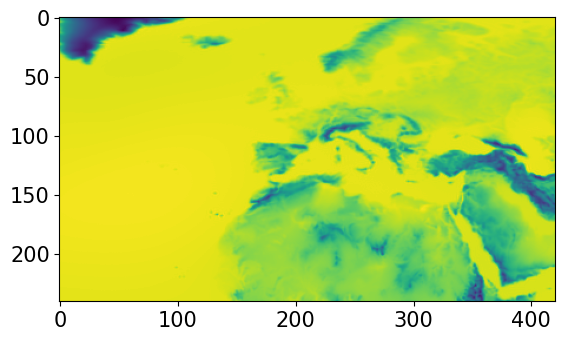

In [23]:
plt.imshow(pres[-1, ...])

In [59]:
pres = pres.squeeze()

In [60]:
from scipy.interpolate import interp1d

In [91]:
## Test for change in specific humidity, assuming constant relative humidity

In [61]:
T_ok = np.empty_like(pres)
R_ok = np.empty_like(pres)

In [75]:
q_test = inicon.q[0, :, 100, 100]
t_test = inicon.t[0, :, 100, 100]

In [76]:
def fact(T1, T2):
    alpha1 = 17.67*(T1-273.15)/(T1-29.65)
    alpha2 = 17.67*(T2-273.15)/(T2-29.65)
    return np.exp(alpha2-alpha1)

In [85]:
pio = interp1d(np.log(trends.plev), trends.T.values[:, 100, 100], fill_value='extrapolate')
trends_test = pio(np.log(pres[:, 100, 100]))

In [88]:
q_test2 = q_test * fact(t_test, t_test + trends_test)

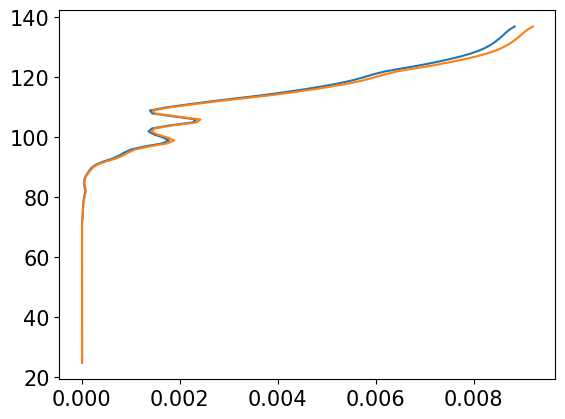

In [90]:
plt.figure()
plt.plot(q_test, q_test.lev)
plt.plot(q_test2, q_test2.lev)

In [92]:
for lo in np.arange(len(trends.lon)):
    print(lo)
    for la in np.arange(len(trends.lat)):
        #print(np.log(pres[:, lo, la])[0], np.log(pres[:, lo, la])[-1])
        #print(np.log(trends.plev))
        pio = interp1d(np.log(trends.plev), trends.T.values[:, lo, la], fill_value='extrapolate')
        T_ok[:, lo, la] = pio(np.log(pres[:, lo, la]))

        # pio = interp1d(np.log(trends.plev), trends.R.values[:, lo, la], fill_value='extrapolate')
        # R_ok[:, lo, la] = pio(np.log(pres[:, lo, la]))
    

0
1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

## Test on one init file

In [117]:
T_ok[0].shape

(241, 421)

In [26]:
fil = 'IFS_Era5_2023043000.grib.grib2'

orig = pygrib.open(cart_init + fil)
orig.rewind()

# names = []
allstr = []
for grb in orig:
    print(grb.name, grb.level)
    grb.expand_grid(False)
    # if grb.name not in names:
        # names.append(grb.name)
        # print(grb.name)

    if grb.name == 'Temperature':
        ### Sum trend
        old_T = grb.values
        new_T = old_T + T_ok[grb.level-25, ...].reshape(241*421)

        break
        grb.values = new_T
    elif grb.name == 'Specific humidity':
        ### Adjust to new temp (read above)
        grb.values = grb.values * fact(old_T, new_T)
    elif grb.name == 'Soil temperature':
        if grb.level == 0:
            grb.values = grb.values + trends['STL1'].values.reshape(241*421)
    elif grb.name == 'Logarithm of surface pressure':
        grb.values = grb.values + trends['lnsp'].values.reshape(241*421)
    elif grb.name == 'Skin temperature':
        grb.values = grb.values + trends['SKT'].values.reshape(241*421)

    allstr.append(grb.tostring())

grbout = open(cart_out + fil, 'wb')
for msg in allstr:
    grbout.write(msg)
grbout.close()

# b100_ini.rewind()
# allstr = []
# for grb in b100_ini:
#     grb.expand_grid(False)
#     if grb.name == 'Snow depth':
#         grb.values = sd100_mod_unif
#     allstr.append(grb.tostring())

# grbout = open(cart_out + 'new_b'+ye[1:]+'_init_landicex100.grb','wb')
# for msg in allstr:
#     grbout.write(msg)
# grbout.close()

Temperature 25


NameError: name 'T_ok' is not defined

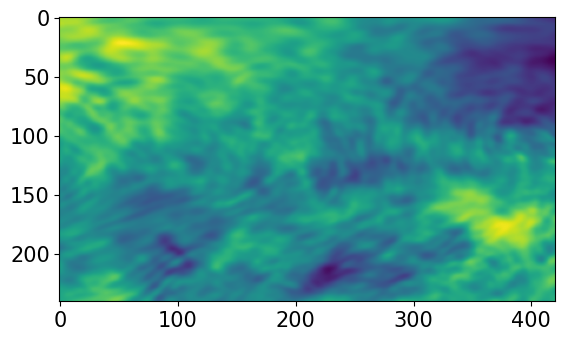

In [27]:
plt.imshow(old_T.reshape(241, 421))

In [155]:
print(trends['SKT'].values.reshape(241*421).mean())

1.2849182


In [153]:
inicon_mod = xr.load_dataset(cart_out + 'nc/' + fil + '.nc')

[-50.0, 55.0, 70.0, 10.0]


<GeoAxes: >

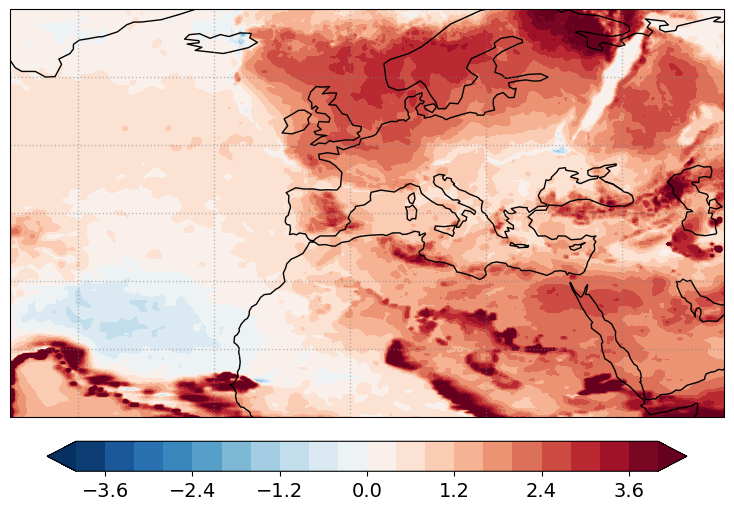

In [159]:
ctl.plot_map_contour(inicon_mod.skt[0] - inicon.skt[0], plot_anomalies=True, cbar_range=(-4,4))

### OLD STUFF

In [87]:
trnew = xr.Dataset()
trnew['T_trend'] = xr.DataArray(T_ok, dims=['lev', 'lat', 'lon'], coords={'lat': trends.lat, 'lon': trends.lon, 'lev': np.arange(25, 138, dtype=float)}, name='T_trend')
trnew['R_trend'] = xr.DataArray(R_ok, dims=['lev', 'lat', 'lon'], coords={'lat': trends.lat, 'lon': trends.lon, 'lev': np.arange(25, 138, dtype=float)}, name='R_trend')

for var in ['hyam', 'hybm', 'hyai', 'hybi']:
    trnew[var] = inicon[var]

trnew.lev.attrs = inicon.lev.attrs


In [89]:
trnew.to_netcdf(cart + 'trend_ERA5_levels.nc')

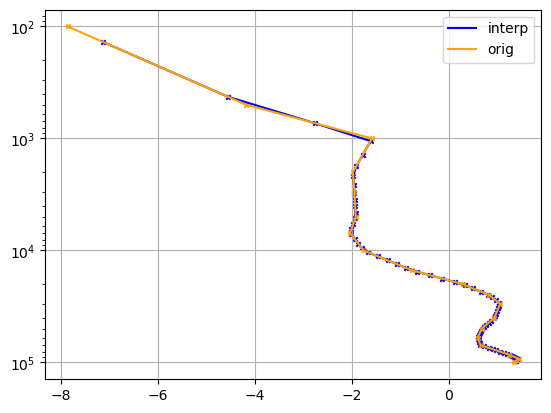

In [48]:
plt.figure()
plt.plot(T_ok[:, lo, la], pres[:, lo, la], color = 'blue', label = 'interp')
plt.plot(trends.T[:, lo, la], trends.plev, color = 'orange', label = 'orig')
plt.scatter(T_ok[:, lo, la], pres[:, lo, la], color = 'blue', s = 10, zorder = -10, marker = 'x')
plt.scatter(trends.T[:, lo, la], trends.plev, color = 'orange', s = 10, zorder = -10, marker = 'x')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.grid()
plt.legend()

In [ ]:
# stop here

### Convert to fake hybrid to cheat with remapeta

In [1]:
# change plev to lev in coordinates
# hyia is plev
# hyib is 0.
# new dim: nhym

levnam = 'lev'

trmod = trends.assign_coords(lev = np.arange(1, len(trends.plev)+1))
nuattrs = bau.lev.attrs

nuattrs['positive'] = 'up'
trmod.lev.attrs = nuattrs
print(trmod.lev.attrs)

trnew = xr.Dataset()
for var in trmod.data_vars:
    okmat = trmod[var].values.squeeze()[np.newaxis, ...]
    print(okmat.shape)
    if okmat.ndim == 4:
        okmat = okmat.swapaxes(1, 2)
        okmat = okmat.swapaxes(2, 3)
        var2 = xr.DataArray(okmat, dims=['time', 'lat', 'lon', 'lev'], coords={'time': trmod.time, 'lat': trmod.lat, 'lon': trmod.lon, 'lev': trmod.lev}, name=var)
    else:
        var2 = xr.DataArray(okmat, dims=['time', 'lat', 'lon'], coords={'time':trmod.time, 'lat': trmod.lat, 'lon': trmod.lon}, name=var)
    trnew[var] = var2

trnew = trnew.assign_coords({'time': trmod.time})

#trmod = trmod.drop_dims('plev')

trnew['hyam'] = xr.DataArray(trmod.plev.values, dims = ['nhym'])
trnew['hybm'] = xr.DataArray(np.zeros(len(trmod.plev)), dims = ['nhym'])
trnew['hyai'] = xr.DataArray(np.append(trmod.plev.values, [trmod.plev.values[-1]]), dims = ['nhyi'])
trnew['hybi'] = xr.DataArray(np.zeros(len(trmod.plev)+1), dims = ['nhyi'])

trnew = trnew.rename({'T': 't'})
trnew['t'].attrs['standard_name'] = 'air_temperature'
trnew.to_netcdf(cart + 'trends_mod.nc')


NameError: name 'trends' is not defined

In [21]:
# change plev to lev in coordinates
# hyia is plev
# hyib is 0.
# new dim: nhym

levnam = 'lev'

trmod = trends.assign_coords(lev = np.arange(1, len(trends.plev)+1))
nuattrs = bau.lev.attrs

nuattrs['positive'] = 'up'

#nuattrs['positive'] = 'up'
trmod.lev.attrs = nuattrs
print(trmod.lev.attrs)

trnew = xr.Dataset()
for var in trmod.data_vars:
    okmat = trmod[var].values.squeeze()
    print(okmat.shape)
    if okmat.ndim == 3:
        var2 = xr.DataArray(okmat, dims=['lev', 'lat', 'lon'], coords={'lat': trmod.lat, 'lon': trmod.lon, 'lev': trmod.lev}, name=var)
    else:
        var2 = xr.DataArray(okmat, dims=['lat', 'lon'], coords={'lat': trmod.lat, 'lon': trmod.lon}, name=var)
    trnew[var] = var2

#trmod = trmod.drop_dims('plev')

trnew['hyam'] = xr.DataArray(trmod.plev.values, dims = ['nhym'])
trnew['hybm'] = xr.DataArray(np.zeros(len(trmod.plev)), dims = ['nhym'])
trnew['hyai'] = xr.DataArray(np.append(trmod.plev.values, [trmod.plev.values[-1]]), dims = ['nhyi'])
trnew['hybi'] = xr.DataArray(np.zeros(len(trmod.plev)+1), dims = ['nhyi'])

trnew = trnew.rename({'T': 't'})
trnew['t'].attrs['standard_name'] = 'air_temperature'
trnew.to_netcdf(cart + 'trends_mod2.nc')


{'standard_name': 'hybrid_sigma_pressure', 'long_name': 'hybrid level at layer midpoints', 'formula': 'hyam hybm (mlev=hyam+hybm*aps)', 'formula_terms': 'ap: hyam b: hybm ps: aps', 'units': 'level', 'positive': 'up'}
(201, 361)
(19, 201, 361)
(19, 201, 361)
(201, 361)


In [54]:
trnew

<xarray.Dataset>
Dimensions:  (lat: 201, lon: 361, time: 1, lev: 19, nhyi: 20, nhym: 19)
Coordinates:
  * lat      (lat) float64 70.0 69.75 69.5 69.25 69.0 ... 20.75 20.5 20.25 20.0
  * lon      (lon) float64 -40.0 -39.75 -39.5 -39.25 ... 49.25 49.5 49.75 50.0
  * lev      (lev) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * time     (time) float64 9.969e+36
Dimensions without coordinates: nhyi, nhym
Data variables:
    MSL      (time, lat, lon) float32 1.735 1.767 1.787 ... -0.03632 -0.03736
    R        (time, lat, lon, lev) float32 -0.8089 -0.7495 ... 0.0001593
    T        (time, lat, lon, lev) float32 0.8222 0.8213 ... -5.555 -10.62
    aps      (time, lat, lon) float32 7e+04 6.982e+04 ... 9.728e+04 9.744e+04
    hyai     (nhyi) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 500.0 100.0 100.0
    hybi     (nhyi) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    hyam     (nhym) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
    hybm     (nhym) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

In [55]:
trnew = trnew.rename({'T': 't'})
trnew['t'].attrs['standard_name'] = 'air_temperature'
trnew.to_netcdf(cart + 'trends_mod.nc')

In [20]:
cdo.remapeta(cart + 'akabika.txt', cart + 'trends_mod.nc', cart + 'trends_interp_globo.nc')

Found operator:remapeta


In [68]:
trnew

<xarray.Dataset>
Dimensions:  (lat: 201, lon: 361, lev: 19, nhym: 19, nhyi: 19)
Coordinates:
  * lat      (lat) float64 70.0 69.75 69.5 69.25 69.0 ... 20.75 20.5 20.25 20.0
  * lon      (lon) float64 -40.0 -39.75 -39.5 -39.25 ... 49.25 49.5 49.75 50.0
  * lev      (lev) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Dimensions without coordinates: nhym, nhyi
Data variables:
    MSL      (lat, lon) float32 1.735 1.767 1.787 ... -0.03566 -0.03632 -0.03736
    R        (lev, lat, lon) float32 -0.8089 -0.9174 ... 0.0001595 0.0001593
    T        (lev, lat, lon) float32 0.8222 0.8088 0.8003 ... -10.62 -10.62
    aps      (lat, lon) float32 7e+04 6.982e+04 ... 9.728e+04 9.744e+04
    hyam     (nhym) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
    hybm     (nhym) float64 0.001 0.001 0.001 0.001 ... 0.001 0.001 0.001 0.001
    hyai     (nhyi) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
    hybi     (nhyi) float64 0.001 0.001 0.001 0.001 ... 0.001 0.001 0.001 0.001

In [39]:
trmod

<xarray.Dataset>
Dimensions:  (time: 1, lon: 361, lat: 201, plev: 19, lev: 19)
Coordinates:
  * time     (time) float64 9.969e+36
  * lon      (lon) float64 -40.0 -39.75 -39.5 -39.25 ... 49.25 49.5 49.75 50.0
  * lat      (lat) float64 70.0 69.75 69.5 69.25 69.0 ... 20.75 20.5 20.25 20.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lev      (lev) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    MSL      (lat, lon) float32 dask.array<chunksize=(201, 361), meta=np.ndarray>
    R        (plev, lat, lon) float32 dask.array<chunksize=(10, 101, 181), meta=np.ndarray>
    T        (plev, lat, lon) float32 dask.array<chunksize=(10, 101, 181), meta=np.ndarray>
    aps      (lat, lon) float32 dask.array<chunksize=(201, 361), meta=np.ndarray>

In [11]:
trends

<xarray.Dataset>
Dimensions:  (time: 1, lon: 361, lat: 201, plev: 19)
Coordinates:
  * time     (time) float64 9.969e+36
  * lon      (lon) float64 -40.0 -39.75 -39.5 -39.25 ... 49.25 49.5 49.75 50.0
  * lat      (lat) float64 70.0 69.75 69.5 69.25 69.0 ... 20.75 20.5 20.25 20.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Data variables:
    MSL      (lat, lon) float32 dask.array<chunksize=(201, 361), meta=np.ndarray>
    R        (plev, lat, lon) float32 dask.array<chunksize=(10, 101, 181), meta=np.ndarray>
    T        (plev, lat, lon) float32 dask.array<chunksize=(10, 101, 181), meta=np.ndarray>
    aps      (lat, lon) float32 dask.array<chunksize=(201, 361), meta=np.ndarray>

In [3]:
ic_orig = xr.open_dataset(cart + 'pstocchi/IFS_Era5_2023050202.nc')

In [4]:
ic_orig

<xarray.Dataset>
Dimensions:       (time: 1, lon: 421, lat: 241, lev: 113, nhyi: 138, nhym: 137,
                   lev_2: 1, depth: 1, bnds: 2, depth_2: 1, depth_3: 1,
                   depth_4: 1)
Coordinates:
  * time          (time) datetime64[ns] 2023-05-02T02:00:00
  * lon           (lon) float64 -50.0 -49.75 -49.5 -49.25 ... 54.5 54.75 55.0
  * lat           (lat) float64 70.0 69.75 69.5 69.25 ... 10.75 10.5 10.25 10.0
  * lev           (lev) float64 25.0 26.0 27.0 28.0 ... 134.0 135.0 136.0 137.0
  * lev_2         (lev_2) float64 1.0
  * depth         (depth) float64 0.0
  * depth_2       (depth_2) float64 7.0
  * depth_3       (depth_3) float64 28.0
  * depth_4       (depth_4) float64 100.0
Dimensions without coordinates: nhyi, nhym, bnds
Data variables: (12/31)
    hyai          (nhyi) float64 ...
    hybi          (nhyi) float64 ...
    hyam          (nhym) float64 ...
    hybm          (nhym) float64 ...
    depth_bnds    (depth, bnds) float64 ...
    depth_2_bnds  (depth_2, bnds) float64 ...
    ...            ...
    stl1          (time, depth, lat, lon) float32 ...
    stl2          (time, depth_2, lat, lon) float32 ...
    lsm           (time, lat, lon) float32 ...
    stl3          (time, depth_3, lat, lon) float32 ...
    skt           (time, lat, lon) float32 ...
    stl4          (time, depth_4, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Tue Feb 06 15:18:09 2024: cdo -f nc copy IFS_Era5_202305020...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [63]:
for el in bau: print(el, bau[el].attrs, bau[el].coords)

hyai {} Coordinates:
    *empty*
hybi {} Coordinates:
    *empty*
hyam {} Coordinates:
    *empty*
hybm {} Coordinates:
    *empty*
t {'standard_name': 'air_temperature', 'long_name': 'Temperature', 'units': 'K', 'param': '0.0.0'} Coordinates:
  * time     (time) datetime64[ns] 2000-01-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 133.0 134.0 135.0 136.0 137.0
q {'standard_name': 'specific_humidity', 'long_name': 'Specific humidity', 'units': 'kg kg**-1', 'param': '0.1.0'} Coordinates:
  * time     (time) datetime64[ns] 2000-01-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 133.0 134.0 135.0 136.0 137.0
u {'standard_name': 'eastward_wind', 'long_name': 'U component

In [31]:
bau['hybi'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [ ]:
pino = xr.load_dataset('/work/users/zappa/ERA5/molochAtt/day/temperature_ml21_1940.nc')
pino
pio = xr.DataArray(np.ones(pino['t'][0,0,...].shape) + 100000., dims=['latitude', 'longitude'], coords={'latitude':pino.latitude, 'longitude':pino.longitude}, name='aps')
pino['aps'] = pio
gigi= xr.open_dataset('/work/users/davini/retrieve-ic/ERA5-model-levels.nc', engine = 'cfgrib')
mario = xr.open_dataset('/home/fabiano/bau.nc')

mario
del mario['surface_air_pressure']
del mario['aps']
mario.dims
pio = xr.DataArray(np.ones(mario['t'][0,0,...].shape) + 100000., dims=['lat', 'lon'], coords={'lat':mario.lat, 'lon':mario.lon}, name='aps')
mario['hyam'] = mario['hyam']*0. + np.linspace(1., 10000., 137)
mario['hybm'] = mario['hybm']*0.
mario['hybi'] = mario['hybi']*0.
mario['hyai'] = mario['hyai']*0. + np.linspace(1., 10000., 138)
mario
mario['aps'] = pio

mario['aps'].attrs = {'standard_name': 'surface_air_pressure'}

mario.to_netcdf('/home/fabiano/bau_ps_fakepres.nc')
mario['hyam']

gigi.to_dict()
gigi.
